<a href="https://colab.research.google.com/github/AARSHGHEWDE/ML/blob/master/J067_EXP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Exercise 1**

In [ ]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [ ]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [ ]:
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns') #Dropping unnecessary columns

In [ ]:
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region','DevName':'Development-Status'}, inplace=True) #Renaming columns to undertandable terms

In [ ]:
canada['TotalImmigration'] = canada.sum(axis='columns') #Adding a column to show the total immagrants in all the countries over the years

In [ ]:
canada.isnull().sum() #Checking for null values

Country               0
Continent             0
Continent-Region      0
Development-Status    0
1980                  0
1981                  0
1982                  0
1983                  0
1984                  0
1985                  0
1986                  0
1987                  0
1988                  0
1989                  0
1990                  0
1991                  0
1992                  0
1993                  0
1994                  0
1995                  0
1996                  0
1997                  0
1998                  0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
2013                  0
TotalImmigration      0
dtype: int64

In [ ]:
canada.set_index('Country', inplace = True) #Changing the index values for better understanding and referencing
canada.head()

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
canada.columns = list(map(str,canada.columns)) #Converting the format of the columns to str for easier referencing
canada.columns

Index(['Continent', 'Continent-Region', 'Development-Status', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'TotalImmigration'],
      dtype='object')

**PIE CHART**

In [ ]:
years = list(map(str, range(1980,2014)))

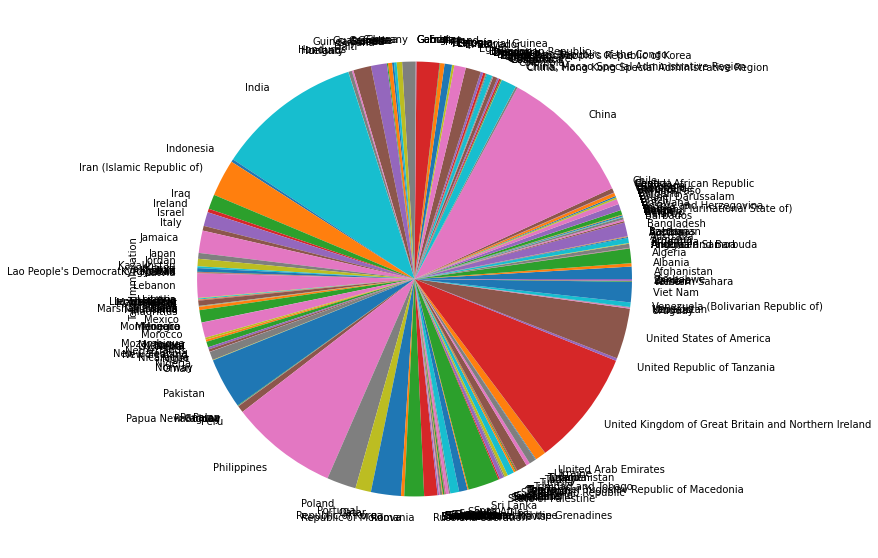

In [ ]:
canada['TotalImmigration'].plot(kind='pie',figsize=(10,10))

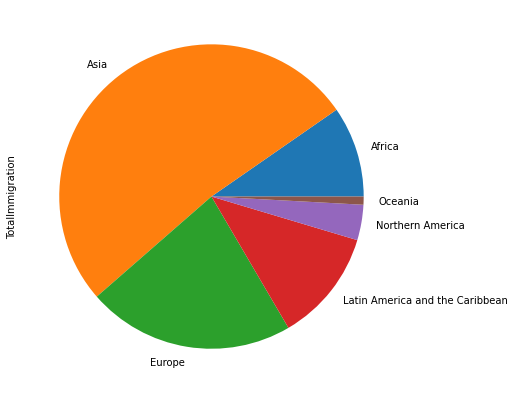

In [ ]:
conti = canada.groupby('Continent', axis='index').sum() #Grouping all the continent data for Continent-Region Pie-chart
conti['TotalImmigration'].plot(kind='pie', figsize=(7, 7))

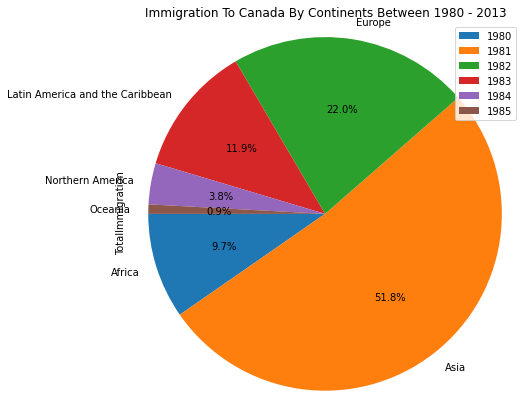

In [ ]:
conti['TotalImmigration'].plot(kind='pie', figsize=(7, 7),
                                      startangle = 180, autopct = '%1.1f%%')
plt.title('Immigration To Canada By Continents Between 1980 - 2013')
plt.axis('equal')
plt.legend(labels = conti.columns, loc='upper right')
plt.show()  #Re-arranging and modifying the plot

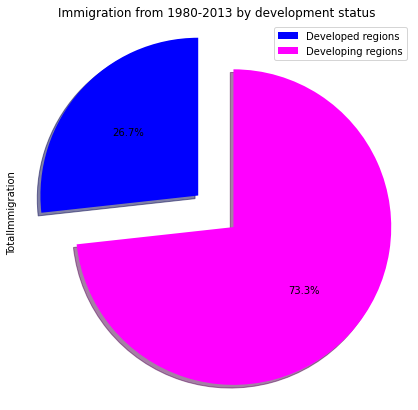

In [ ]:
devstatus = canada.groupby('Development-Status', axis='index').sum()
explodeList = [0.3,0]
colorList=['blue','magenta']
devstatus['TotalImmigration'].plot(kind='pie', figsize=(7,7), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, colors = colorList, explode = explodeList)
plt.title('Immigration from 1980-2013 by development status')
plt.axis('equal')
plt.legend(labels= devstatus.index,loc ='upper right')
plt.show()

**Box-Plots**

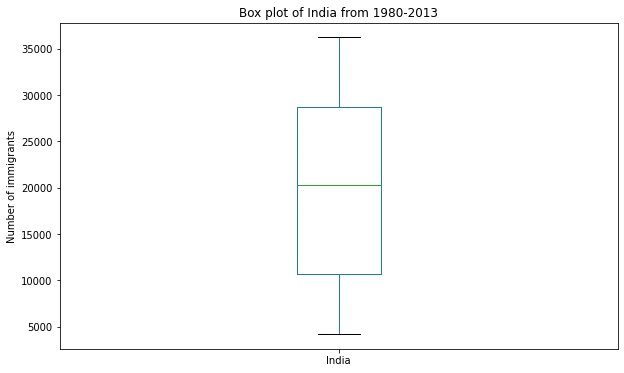

In [ ]:
india = canada.loc['India', years] #Basic boxplot for immigrants from India
india.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

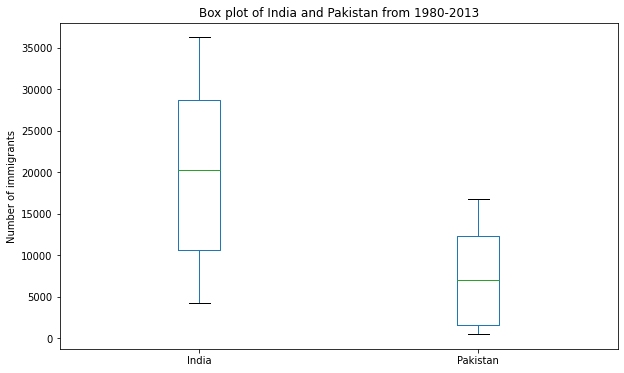

In [ ]:
indopak = canada.loc[['India','Pakistan'], years].transpose() #Comparing immigrants from India and Pakistan
indopak.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India and Pakistan from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

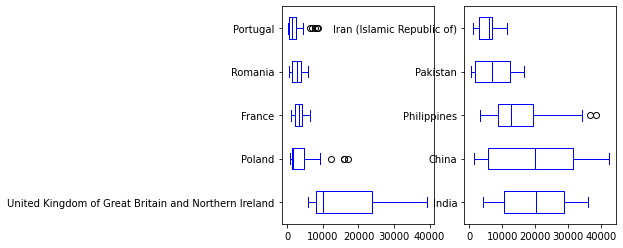

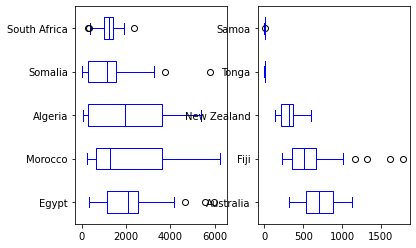

In [ ]:
## 4 Sub-plots
asia = canada[(canada['Continent']=='Asia')].sort_values('TotalImmigration', ascending=False).head()
eur = canada[(canada['Continent']=='Europe')].sort_values('TotalImmigration', ascending=False).head()
afr = canada[(canada['Continent']=='Africa')].sort_values('TotalImmigration', ascending=False).head()
ocn = canada[(canada['Continent']=='Oceania')].sort_values('TotalImmigration', ascending=False).head()

asia = asia[years].transpose()
eur = eur[years].transpose()
afr = afr[years].transpose()
ocn = ocn[years].transpose()
fig = plt.figure()  
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fig2 = plt.figure()
ax3 = fig2.add_subplot(1,2,1)
ax4 = fig2.add_subplot(1,2,2)
eur.plot(kind='box', color='blue', vert=False, ax=ax1)
asia.plot(kind='box', color='blue', vert=False, ax=ax2)
afr.plot(kind='box', color='blue', vert=False, ax=ax3)
ocn.plot(kind='box', color='blue', vert=False, ax=ax4)

In [ ]:
##Finding outliers
temp = asia.describe()
Q1 = temp.loc['25%', 'Philippines']
Q3 = temp.loc['75%', 'Philippines']
IQR = Q3-Q1
Outlier1 = Q3 + 1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)
asia[asia['Philippines']>Outlier1]

35128.0
-7216.0


Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479


**Scatter plots and Bubble plots** 

[ 9.34267991e+02 -1.84491593e+06]


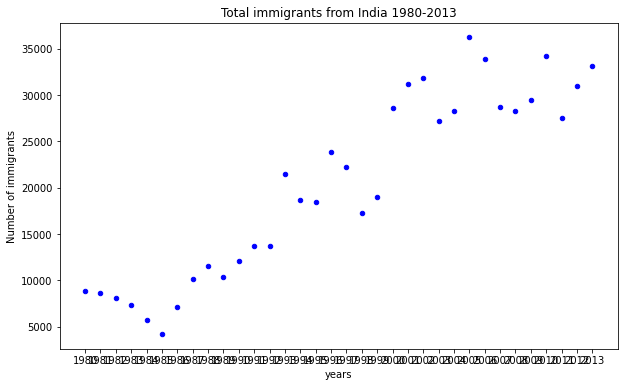

In [ ]:
indopak.reset_index(inplace=True)
indopak.rename(columns={'Country':'index','index':'Year'}, inplace=True)

x = indopak['Year'].astype('int64')
y = indopak['India']
fit = np.polyfit(x,y,deg=1)
print(fit)
indopak.plot(kind='scatter', x='Year', y='India', color='blue', figsize=(10,6))
plt.title('Total immigrants from India 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")

#plt.plot(x, fit[0]*x+fit[1], color='red')
plt.show()

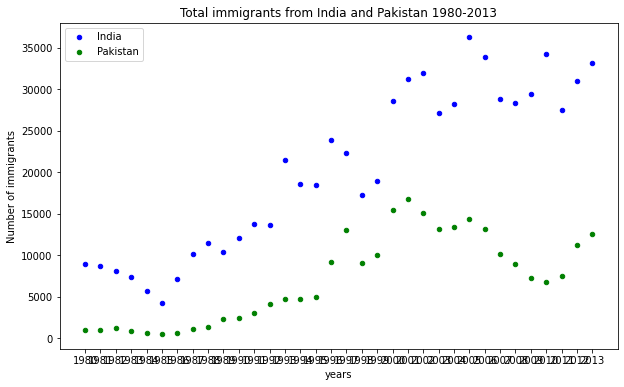

In [ ]:
ax0 = indopak.plot(kind='scatter', x='Year', y='India', color='blue', figsize=(10,6))

indopak.plot(kind='scatter', x='Year', y='Pakistan', color='green', figsize=(10,6), ax=ax0)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

plt.show()

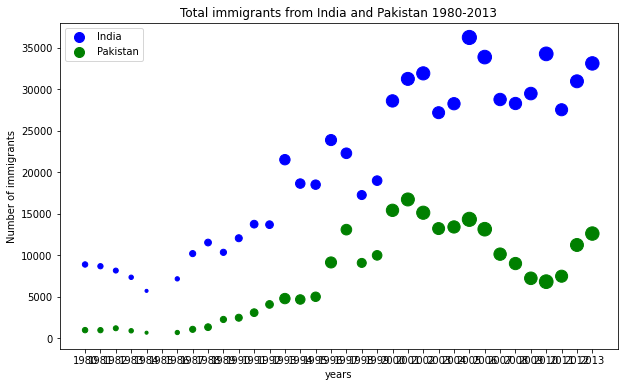

In [ ]:
norm_india = (indopak['India'] - indopak['India'].min()) / (indopak['India'].max() - indopak['India'].min())
norm_pak = (indopak['Pakistan'] - indopak['Pakistan'].min()) / (indopak['Pakistan'].max() - indopak['Pakistan'].min())

ax0 = indopak.plot(kind='scatter', x='Year', y='India', color='blue', s=norm_india*200, figsize=(10,6))

indopak.plot(kind='scatter', x='Year', y='Pakistan', color='green', s=norm_india*200, figsize=(10,6), ax=ax0)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

plt.show()

In [ ]:
#Bubble plot for Norway, Denmark, Finland

#nordenfin = canada.loc[['Norway','Denmark','Finland'], years]
#nor = (nordenfin.loc['Norway'] - nordenfin.loc['Norway'].min()) / (nordenfin.loc['Norway'].max() - nordenfin.loc['Norway'].min())
#den = (nordenfin.loc['Denmark'] - nordenfin.loc['Denmark'].min()) / (nordenfin.loc['Denmark'].max() - nordenfin.loc['Denmark'].min())
#fin = (nordenfin.loc['Finland'] - nordenfin.loc['Finland'].min()) / (nordenfin.loc['Finland'].max() - nordenfin.loc['Finland'].min())

#nordenfin.reset_index(inplace=True)
#x = nordenfin.loc['Year'].astype('int64')
#y = nordenfin.loc['Norway']
#nordenfin.rename(columns={'Country':'index','index':'Year'}, inplace=True)

#ax0 = nordenfin.plot(kind='scatter', x='Year', y='Norway', color='blue', s=nor*200, figsize=(10,6))

#nordenfin.plot(kind='scatter', x='Year', y='Norway', color='green', s=nor*200, figsize=(10,6), ax=ax0)

#plt.title('Total immigrants')
#plt.xlabel("years")
#plt.ylabel("Number of immigrants")
#ax0.legend(['Norway','Denmark','FInland'], loc='upper left')

#plt.show()

**Waffle chart**

In [ ]:
!pip install pywaffle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pywaffle import Waffle
%matplotlib inline

In [ ]:
scan = canada.loc[['Sweden', 'Denmark', 'Norway'], :]
scan

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327


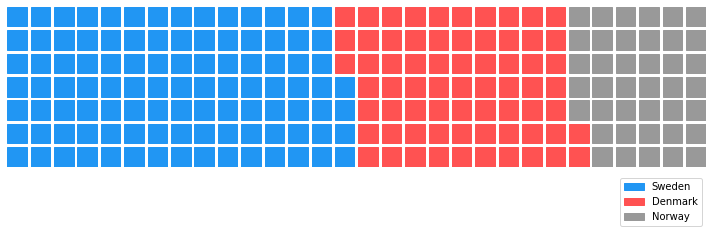

In [ ]:
cat = list(scan.index.values)
vals = scan['TotalImmigration']
fig = plt.figure(FigureClass = Waffle, rows = 7, columns = 30, values = vals, labels = list(cat), 
                 colors=["#2196f3", "#ff5252", "#999999"], figsize=(10,5),
                legend = {'loc': 'lower left', 'bbox_to_anchor': (0.87, -0.4)})

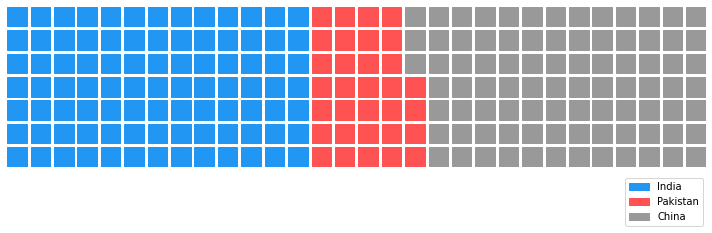

In [ ]:
indpakchi = canada.loc[['India', 'Pakistan', 'China'], :]
cat = list(indpakchi.index.values)
vals = indpakchi['TotalImmigration']
fig = plt.figure(FigureClass = Waffle, rows = 7, columns = 30, values = vals, labels = list(cat), 
                 colors=["#2196f3", "#ff5252", "#999999"], figsize=(10,5),
                legend = {'loc': 'lower left', 'bbox_to_anchor': (0.878, -0.4)})

**Maps**

In [ ]:
import folium

In [ ]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10)
worldmap

In [ ]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')
worldmap

In [ ]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=1, tiles='Stamen Terrain')
worldmap

In [ ]:
incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')
print(incidents.head())
print(incidents.shape)

Dataset downloaded and read into a pandas dataframe!
   IncidntNum  ...            PdId
0   120058272  ...  12005827212120
1   120058272  ...  12005827212168
2   141059263  ...  14105926363010
3   160013662  ...  16001366271000
4   160002740  ...  16000274071000

[5 rows x 13 columns]
(150500, 13)


In [ ]:
limit = 100
inc = incidents.iloc[0:limit,:]

In [ ]:
latitude = 37.77
longitude = -122.42
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

In [ ]:
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)

map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
for lat, long in zip(df1.Y, df1.X):
    incident.add_child(folium.CircleMarker([lat, long], radius = 5, color = 'yellow', fill=True,
            fill_color='blue').add_to(incident))

#add pop ups
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.Marker([lat, long], popup=labs).add_to(map1)

#add incidents/crimes to the map
map1.add_child(incident)

In [ ]:
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = incident.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker([lat, long], popup=labs, radius=5, color='yellow', fill=True, 
                            fill_color='blue').add_to(map1)

#add incidents/crimes to the map
map1

AttributeError: ignored

In [ ]:
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = df_incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker([lat, long], popup=labs, radius=5, color='yellow', fill=True, 
                            fill_color='blue').add_to(map1)

#add incidents/crimes to the map
map1

In [ ]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-Status'}, inplace=True)
canada['TotalImmigration'] = canada.sum(axis='columns')
canada.head()

In [ ]:

world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(geo_data=world_geo, data=canada, columns=['Country', 'TotalImmigration'], 
                     key_on='feature.properties.name', fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='Immigration to Canada')

# display map
world_map